In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from visualizations import sub_plots_by_feature, nc_sub_plotter, heatmaps

# ForeSight2020
## Table of Contents <a name = 'toc'></a>
1. [Background/Abstract](#abstract)
1. [Analysis of Data Sources](#datasources)
    1. [BPCS Archived_SO](#bpcs_archived_so)
    2. [BPCS Current_SO](#bpcs_current_so)
    2. [PlantStar](#plantstar)
    3. [SmartSolve NCs](#smartsolve_ncs)
2. [Combined Data Analysis](#combinedanalysis)
    1. [Combining Plantstar and Archived_SO](#plant_archived_combo)
4. [Predicting Quality Issues](#predicition)


## Background
Building off the 2021 Cardinal Health Hackathon finalist project 'ForeSight2020'.


## Abstract
Available data sources for components, tools, presses and non-conformances are explored.  Then machine learning algorithms are applied in attempt to predict the likelihood of a quality issue occurring based on the components, tools and press used during production. 

## Analysis of Data Sources <a name = 'datasources'></a>

Purpose: analyze each data source individually before combining. 

In [2]:
%%time
# This cell runs a data pull on everything.
# import data_retrevial
# data_pull = data_retrevial.Data_Retrevial()
# data_pull.pull_archived_so()
# data_pull.pull_plantstar()
# data_pull.pull_ncs()


Wall time: 0 ns


#### BPCS Archived_SO <a name = 'bpcs_archived_so'></a> 
About: 
* Shop orders that have been completed
* Does not contain Press loc/machine number/tool
* arch_so is helpful for data analysis
* arch_so_encoded is helpful for machine learning



Trying to understand why some shop orders have multiple dates with some in the future. 

In [12]:
arch_so = pd.read_csv('./clean_data/archived_so_clean06-Dec-2021.csv')
arch_so.loc[:,'first_entry_date'] = pd.to_datetime(arch_so.first_entry_date)
print("*"*10+' Archived_SO Summary Statistics ' +'*'*10)
print('Date of first record = {}'.format(arch_so.last_entry_date.min()))
print('Date of most recent record = {}'.format(arch_so.last_entry_date.max()))
print('Number of unique lot numbers = {}'.format(len(arch_so['Lot Number'].unique())))
cff_arch_so = arch_so[arch_so['Value Stream'] == 'Containers']
cff_arch_so.loc[:,'dayofweek'] = cff_arch_so['first_entry_date'].dt.dayofweek
cff_arch_so.loc[:,'month'] = cff_arch_so['first_entry_date'].dt.month
cff_arch_so.loc[:,'day'] = cff_arch_so['first_entry_date'].dt.day
cff_arch_so.loc[:,'year'] = cff_arch_so['first_entry_date'].dt.year
print("*"*10+' cff_arch_so Summary Statistics ' +'*'*10)
print('Date of first record = {}'.format(cff_arch_so.first_entry_date.min()))
print('Date of most recent record = {}'.format(cff_arch_so.first_entry_date.max()))
print('Number of unique lot numbers = {}'.format(len(cff_arch_so['Lot Number'].unique())))
cff_arch_so.head()

********** Archived_SO Summary Statistics **********
Date of first record = 2019-01-02
Date of most recent record = 2021-12-30
Number of unique lot numbers = 6956
********** cff_arch_so Summary Statistics **********
Date of first record = 2019-01-02 00:00:00
Date of most recent record = 2021-12-04 00:00:00
Number of unique lot numbers = 4161


,Unnamed: 0,Lot Number,Product,first_entry_date,last_entry_date,shop_order,requested_qty,resin,Formula Sheet,packaging,...,discontinued,fg,cannula,plunger,bracket key,Value Stream,dayofweek,month,day,year
0,1,09G189482,PT00096177,2019-08-16,2019-08-23,189482,0.000,RM004,FS10002952,R1800,...,NaN,NaN,NaN,NaN,NaN,Containers,4,8,16,2019
7,8,18G10763,85121,2019-01-22,2019-01-23,184437,15000.000,RM004,FS10003096,R1246D,...,NaN,NaN,NaN,NaN,NaN,Containers,1,1,22,2019
8,9,18G12463,8934,2019-02-19,2019-02-19,184455,15200.000,RM160,FS10003181,R1292D,...,NaN,NaN,NaN,NaN,NaN,Containers,1,2,19,2019
9,10,18G20663,1522SA,2019-01-02,2019-01-16,184563,42519.860,RM129,FS10003045,R1302D,...,NaN,NaN,NaN,NaN,NaN,Containers,2,1,2,2019
10,11,18H07763,31378089,2019-01-07,2019-01-09,184778,375645.192,RM157,FS10028268,R1750,...,NaN,NaN,NaN,NaN,NaN,Containers,0,1,7,2019


In [4]:
arch_so[pd.to_datetime(arch_so['last_entry_date'])>dt.datetime(month = 12,year = 2021,day = 6)]

,Unnamed: 0,Lot Number,Product,first_entry_date,last_entry_date,shop_order,requested_qty,resin,Formula Sheet,packaging,...,label kit,barrel,TRAY,tip cap,discontinued,fg,cannula,plunger,bracket key,Value Stream
3551,3577,20C13963X,4502570,2020-03-25,2021-12-30,192210,0.0,0301001,DC00056758,5542735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Syringe
3552,3578,20C14063X,4502570,2020-03-26,2021-12-30,192211,0.0,0301001,DC00056758,5542735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Syringe
4337,4369,20G00863X,8881907003,2020-07-15,2021-12-30,193435,0.0,0301001,FS10017465,5000231,...,NaN,NaN,NaN,7.777130e+09,NaN,NaN,NaN,NaN,NaN,Syringe
6894,6955,21K05563,8980,2021-12-01,2021-12-25,199023,12600.0,RM129,FS10003210,RM054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Containers


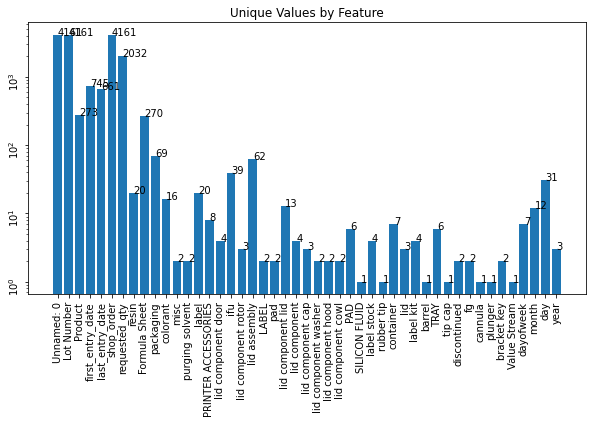

In [5]:
cols_unique_vals = {}
for col in cff_arch_so.columns:
    cols_unique_vals[col] = len(cff_arch_so[col].unique())
f, (axes) = plt.subplots(figsize = (10,5))
x = list(cols_unique_vals.keys())
y = list(cols_unique_vals.values())
axes.bar(x=x, height = y)
axes.tick_params(labelrotation = 90)
axes.set_title('Unique Values by Feature')
axes.set_yscale('log')
[axes.annotate(y[i], (x[i], y[i])) for i, _ in enumerate(y)]


    
plt.show()

*Question: How much do the components vary by product code?
* Investigation product code component variation
    * Some variation in resin
    * no varation in colorant, packaging, misc, label, lid component door, ifu, lid component rotor, LABEL, lid component lid,lid components,container, lid.
* Question: why are there so few unique values in some of these columns like 'lid' and 'container'?

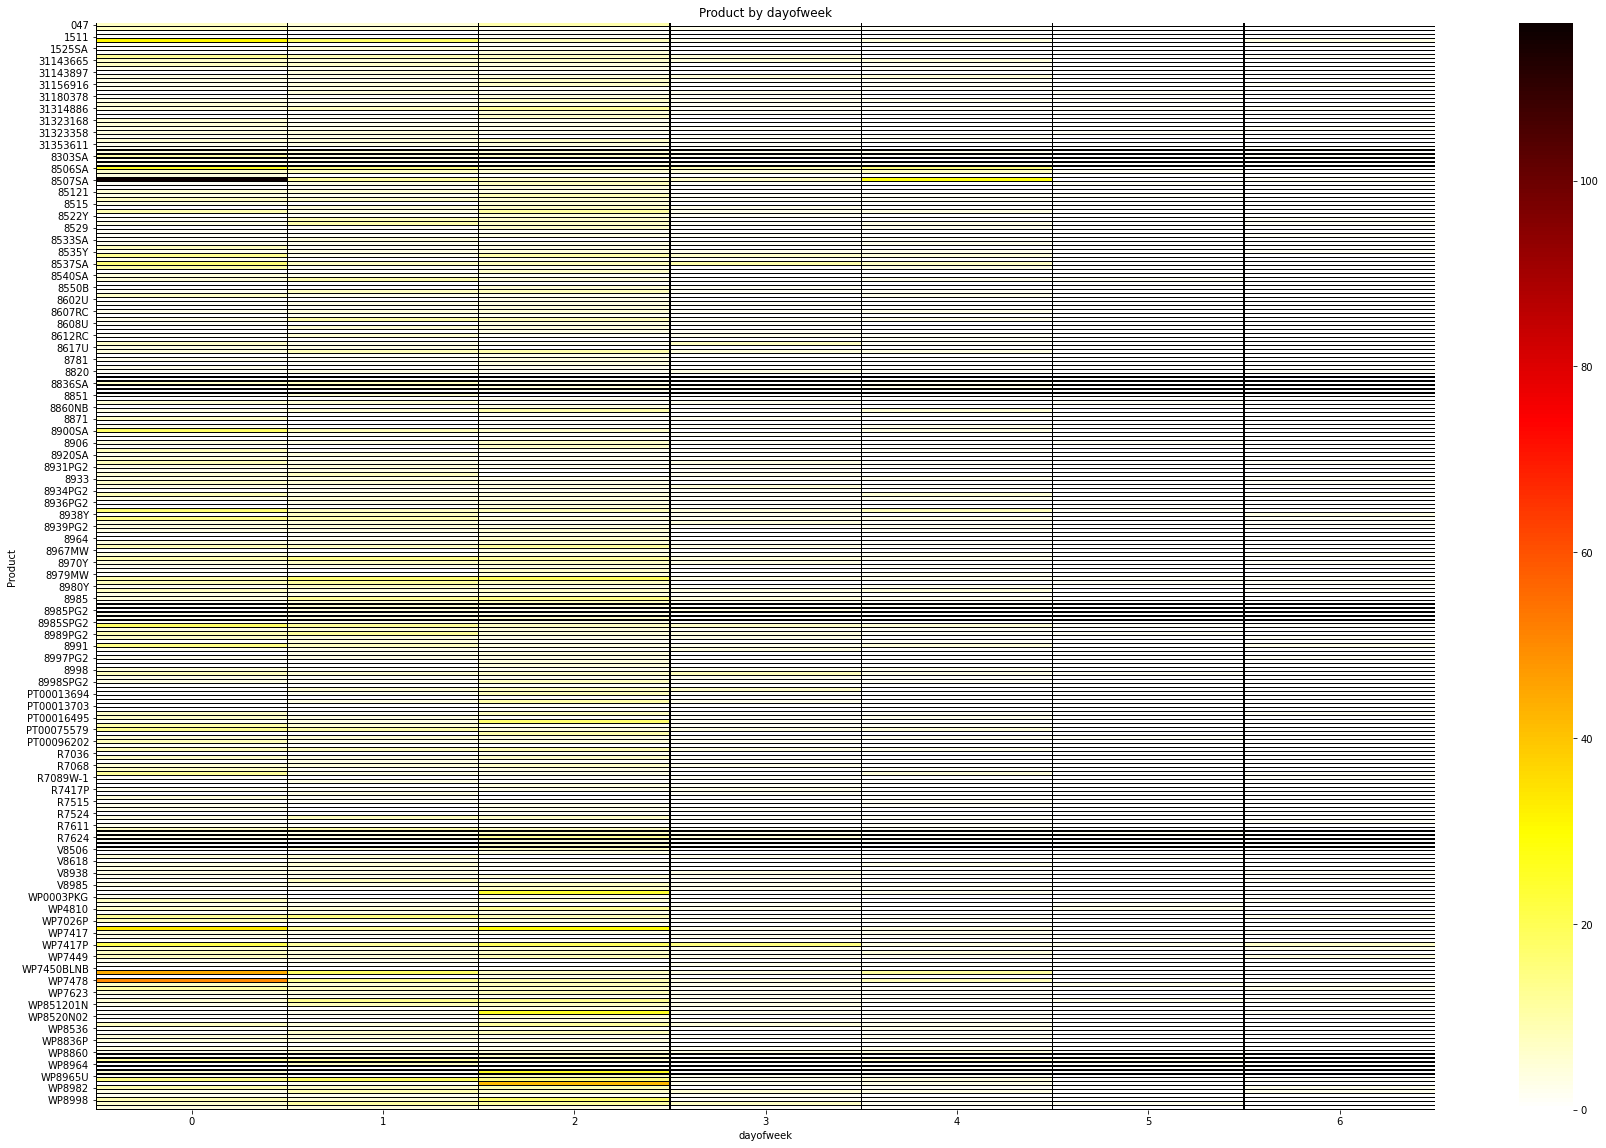

In [144]:
heatmaps(cff_arch_so,'Product','dayofweek')

### Plantstar <a name = 'plantstar'></a>
About:
* only source that contains tool and mach_name data
* manually inputed data from production
    * resin data does not match archived_so resin data
* very limited in number of records 
* only used in CFF?

[table of contents](#toc)

In [14]:
plantstar_df = pd.read_csv('./clean_data/plant_star.csv')
print("*"*10+' Plantstar Summary Statistics ' +'*'*10)
print('Date of first record = {}'.format(plantstar_df.start_time.min()))
print('Date of most recent record = {}'.format(plantstar_df.start_time.max()))
print('Number of unique shop orders = {}'.format(len(plantstar_df['shop_order'].unique())))
plantstar_df.head()

********** Plantstar Summary Statistics **********
Date of first record = 2019-01-02 10:12:53
Date of most recent record = 2021-12-02 17:54:31
Number of unique shop orders = 1406


,Unnamed: 0,shop_order,tool,mach_name,resin,total_pieces,start_time,end_time,number of entries
0,0,185642,R7024L,65-T310,RM171,78654.0,2019-01-02 10:12:53,2019-01-21 14:00:00,59.0
1,1,185463,R7450A,91-T180,RM171,4217217.0,2019-01-02 10:26:01,2019-01-13 18:00:01,20.0
2,2,185596,R7479C-Thin-Wall,54-H1100,RM165,16604.0,2019-01-02 14:00:00,2019-01-08 22:00:00,20.0
3,3,186266,R7036E-Thin-Wall,74-H650,RM129,1100.0,2019-01-02 14:00:00,2019-01-02 14:00:00,1.0
4,4,184693,R7605D,83-T390,RM171,147572.0,2019-01-02 14:00:00,2019-01-23 06:00:00,126.0


In [15]:
plantstar_df

,Unnamed: 0,shop_order,tool,mach_name,resin,total_pieces,start_time,end_time,number of entries
0,0,185642,R7024L,65-T310,RM171,78654.0,2019-01-02 10:12:53,2019-01-21 14:00:00,59.0
1,1,185463,R7450A,91-T180,RM171,4217217.0,2019-01-02 10:26:01,2019-01-13 18:00:01,20.0
2,2,185596,R7479C-Thin-Wall,54-H1100,RM165,16604.0,2019-01-02 14:00:00,2019-01-08 22:00:00,20.0
3,3,186266,R7036E-Thin-Wall,74-H650,RM129,1100.0,2019-01-02 14:00:00,2019-01-02 14:00:00,1.0
4,4,184693,R7605D,83-T390,RM171,147572.0,2019-01-02 14:00:00,2019-01-23 06:00:00,126.0
...,...,...,...,...,...,...,...,...,...
1401,1401,198680,R7413B,67-H800,RM165,17280.0,2021-11-25 05:43:38,2021-12-02 18:00:00,17.0
1402,1402,198666,R7463B,431-T310,RM129,8823.0,2021-11-29 07:53:28,2021-12-02 18:00:00,16.0
1403,1403,198762,R7027D-Thin-Wall,70-N400,RM129,8516.0,2021-11-29 17:33:28,2021-11-30 14:00:00,4.0
1404,1404,198691,R7026D,71-V300,RM171,8536.0,2021-11-29 17:33:32,2021-11-30 14:00:00,4.0


### Smart Solve NCs <a name ='smartsolve_ncs'></a>
[table of contents](#toc)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from visualizations import *
ss_ncs = pd.read_csv('./clean_data/ss_ncs.csv')
containers_mask = ss_ncs['Value Stream'] == 'Container'
status_mask = ss_ncs['Status'] != 'VOID'
resin_mask = ss_ncs['Product'] != 'RM165'

cff_ncs = ss_ncs[containers_mask & status_mask & resin_mask].reset_index(drop = True)
cff_ncs = cff_ncs.drop(columns = 'Unnamed: 0')

cff_ncs['Month'] = pd.to_datetime(cff_ncs['Created Date']).dt.month
cff_ncs['Year'] = pd.to_datetime(cff_ncs['Created Date']).dt.year
cols = ['NC Number','Created Date','Month','Year','Discovery/Plant Area','Product','Initial Failure Mode','IFM Description','IFM Process','IFM Inspection',
        'Root Cause','Root Cause Description','Lot Number','Dispositioned Quantity','Disposition','Status','Value Stream']
cff_ncs = cff_ncs[cols]
print("*"*10+' NC Summary Statistics ' +'*'*10)
print('Date of first record = {}'.format(cff_ncs['Created Date'].min()))
print('Date of most recent record = {}'.format(cff_ncs['Created Date'].max()))
print('Number of unique Lot Numbers = {}'.format(len(cff_ncs['Lot Number'].unique())))
print('Number of unique NC records = {}'.format(len(cff_ncs['NC Number'].unique())))

cff_ncs.head()

********** NC Summary Statistics **********
Date of first record = 2019-01-18
Date of most recent record = 2021-11-17
Number of unique Lot Numbers = 279
Number of unique NC records = 230


,NC Number,Created Date,Month,Year,Discovery/Plant Area,Product,Initial Failure Mode,IFM Description,IFM Process,IFM Inspection,Root Cause,Root Cause Description,Lot Number,Dispositioned Quantity,Disposition,Status,Value Stream
0,NC-IL081-21848,2020-04-13,4,2020,C19,8506SA,CFF-F-Welding,Weld Strength,Welding,Functional,Machine Failure,Machine Failure,20B07863,2280.0,Accept,CLOSED,Container
1,NC-IL081-21944,2020-04-16,4,2020,C64,WP8850,CFF-F-Molding 8,Failed gasket height/width,Gasketing,Functional,Machine Failure,Machine Failure,20C192148,1716.0,Accept,CLOSED,Container
2,NC-IL081-22125,2020-04-22,4,2020,C43B,1522SA,CFF-V-Label Verification and Barcode Verificat...,BH - Missing label,Labeling,Visual,Human Error,Human Error,20B18263,720.0,Accept,CLOSED,Container
3,NC-IL081-22215,2020-04-27,4,2020,C42,85221R,CFF-V-Label Verification and Barcode Verificat...,BH - Missing label,Labeling,Visual,Machine Failure,Machine Failure,20D22063,260.0,Accept,CLOSED,Container
4,NC-IL081-22688,2020-05-16,5,2020,C89,31353603,CFF-V-Labeling - Product & Overshipper 1,Product and Lot Number is incomplete or missing,Labeling,Visual,Uneven platen roller,The uneven platen roller of the printer caused...,20C07063,1596.0,Accept,CLOSED,Container


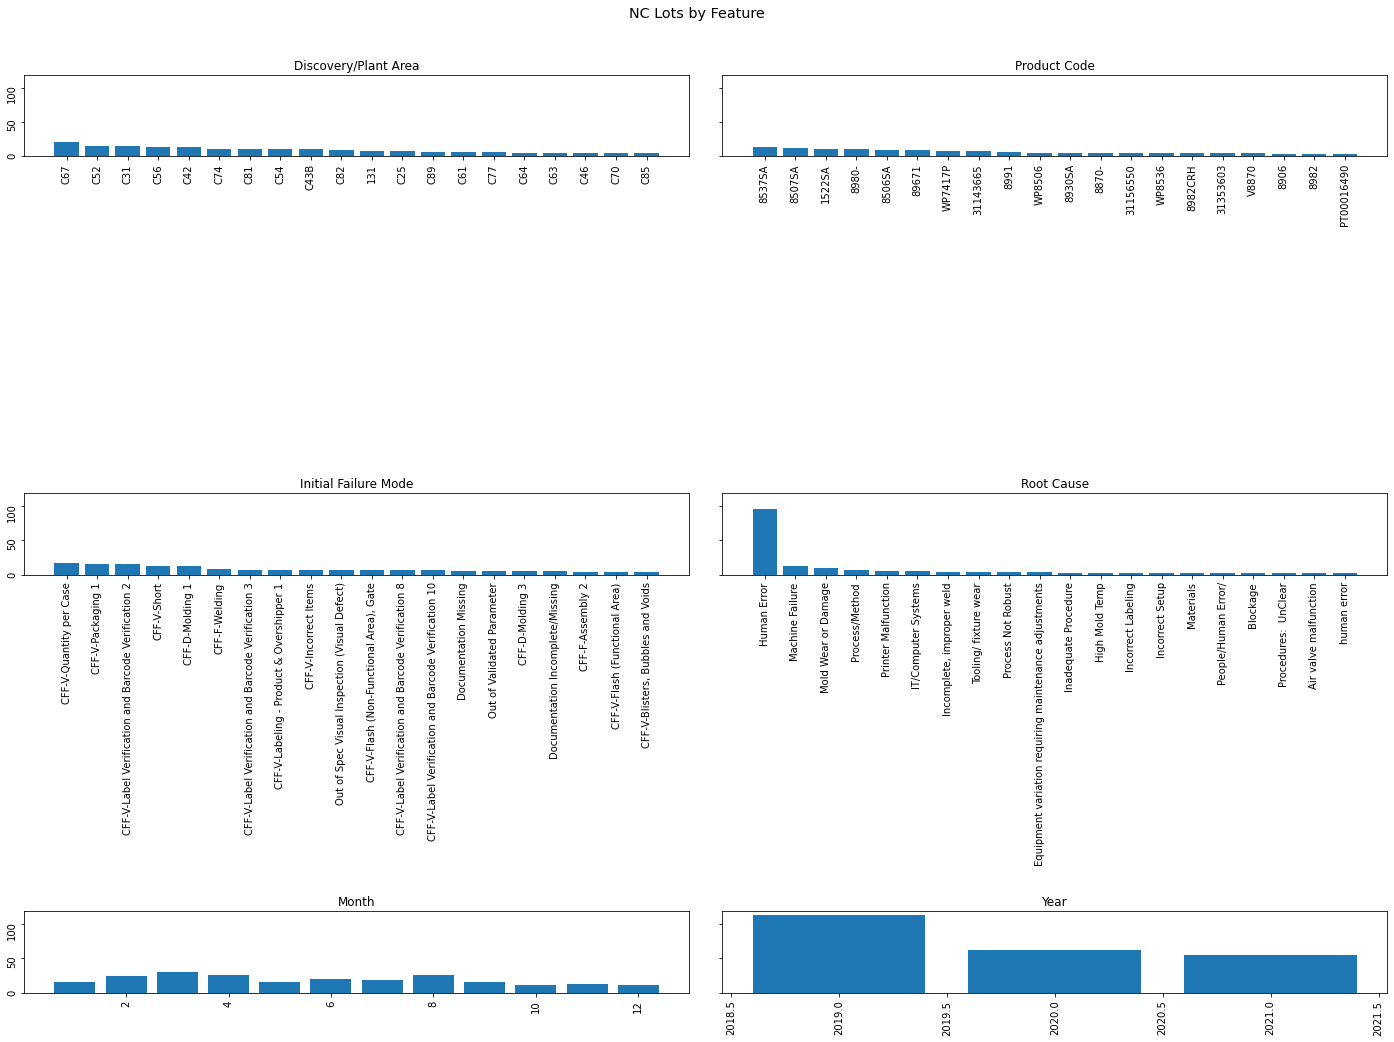

In [18]:
sub_plots_by_feature(cff_ncs,figsize = (20,15))

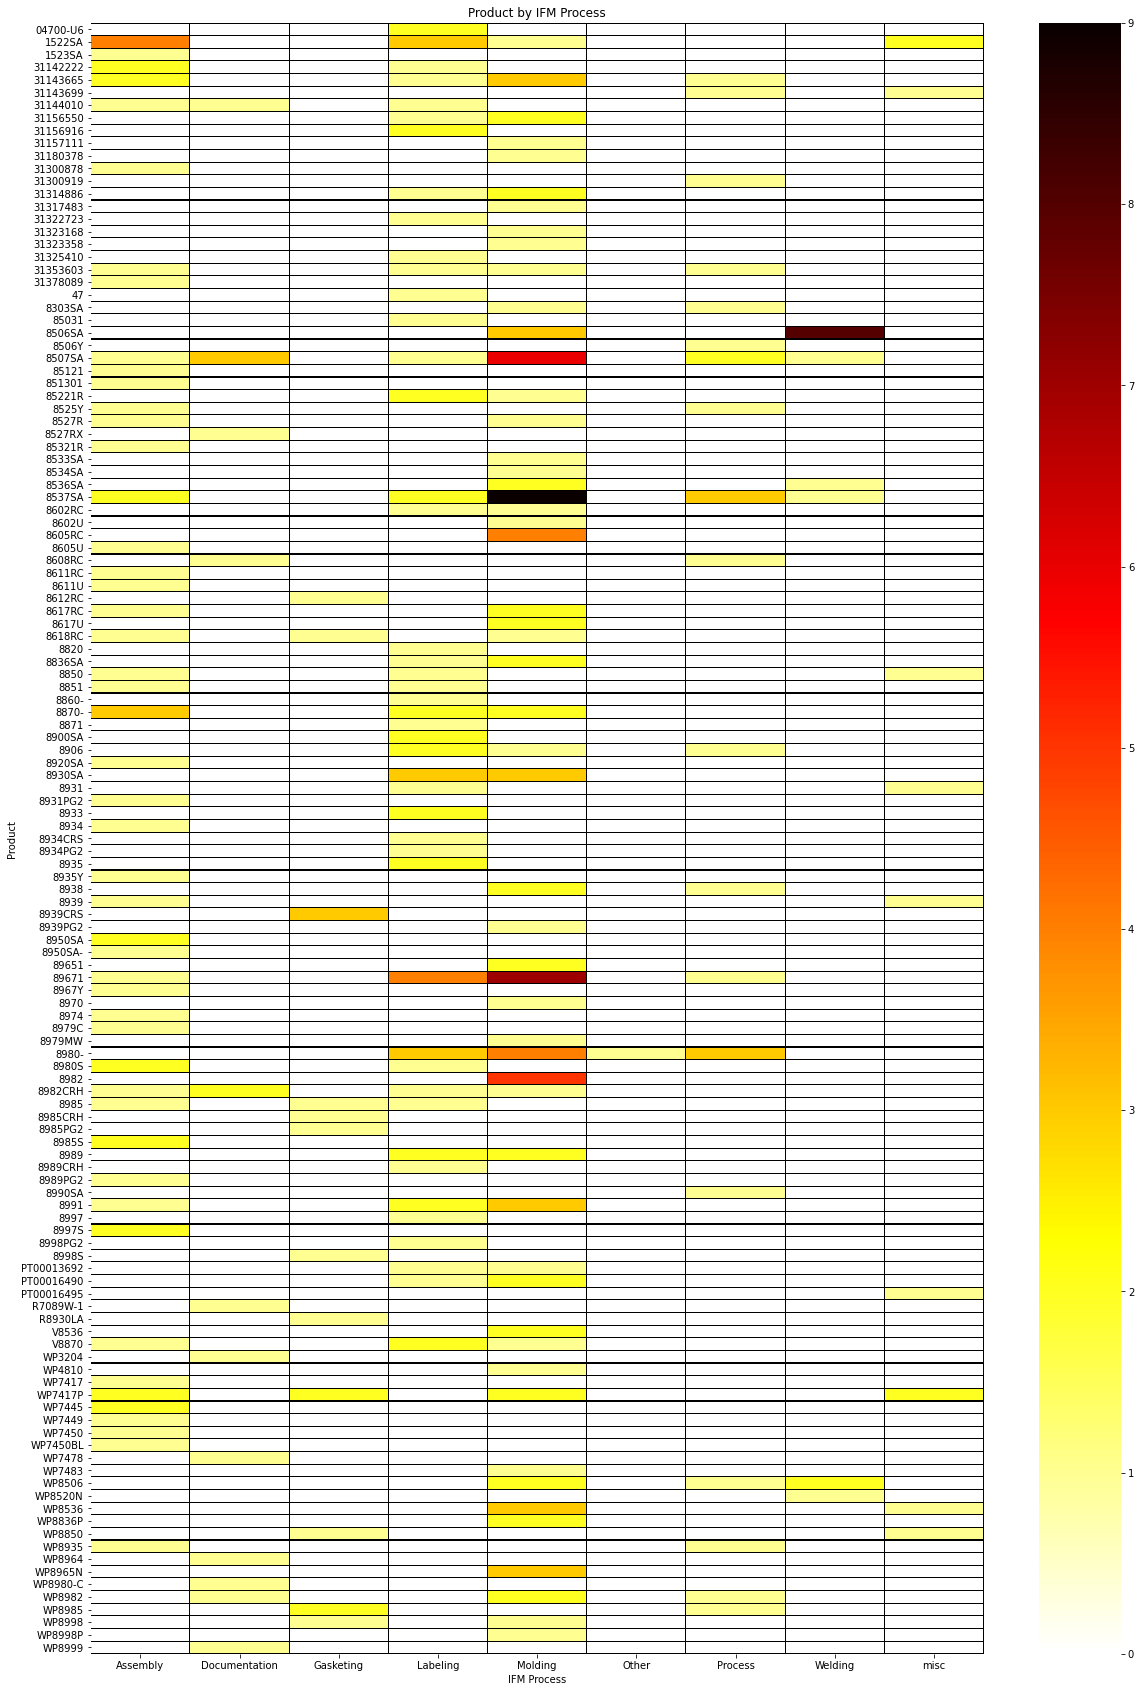

In [19]:
heatmaps(cff_ncs,'Product','IFM Process',figsize = (20,30))

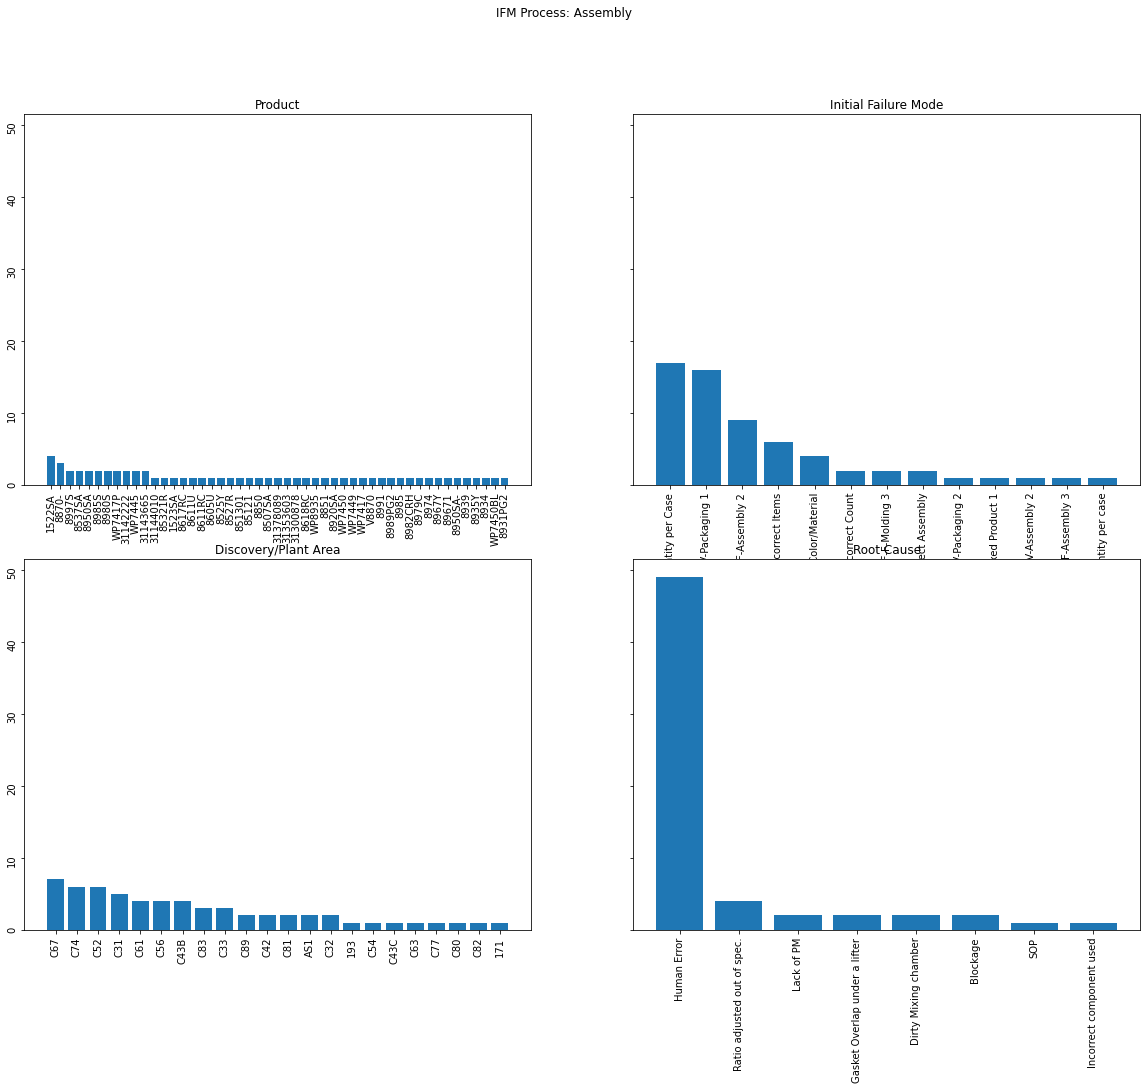

In [22]:
nc_sub_plotter(cff_ncs,'IFM Process','Assembly',figsize = (20,15))

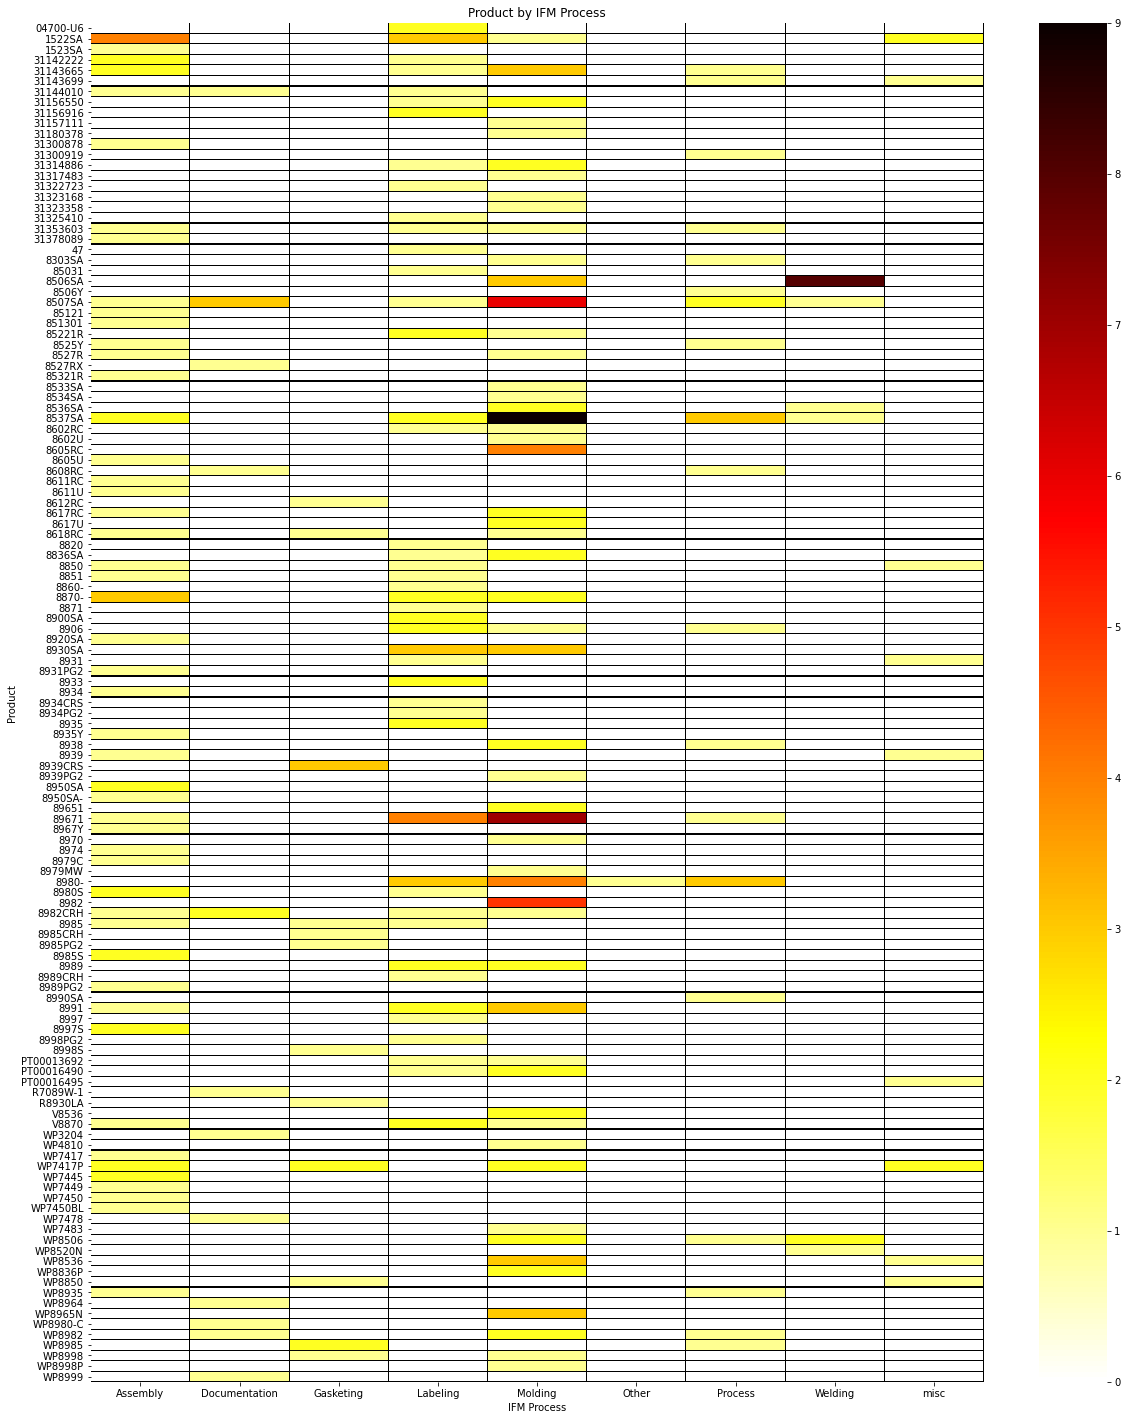

In [24]:
heatmaps(cff_ncs,'Product','IFM Process',figsize = (20,25))

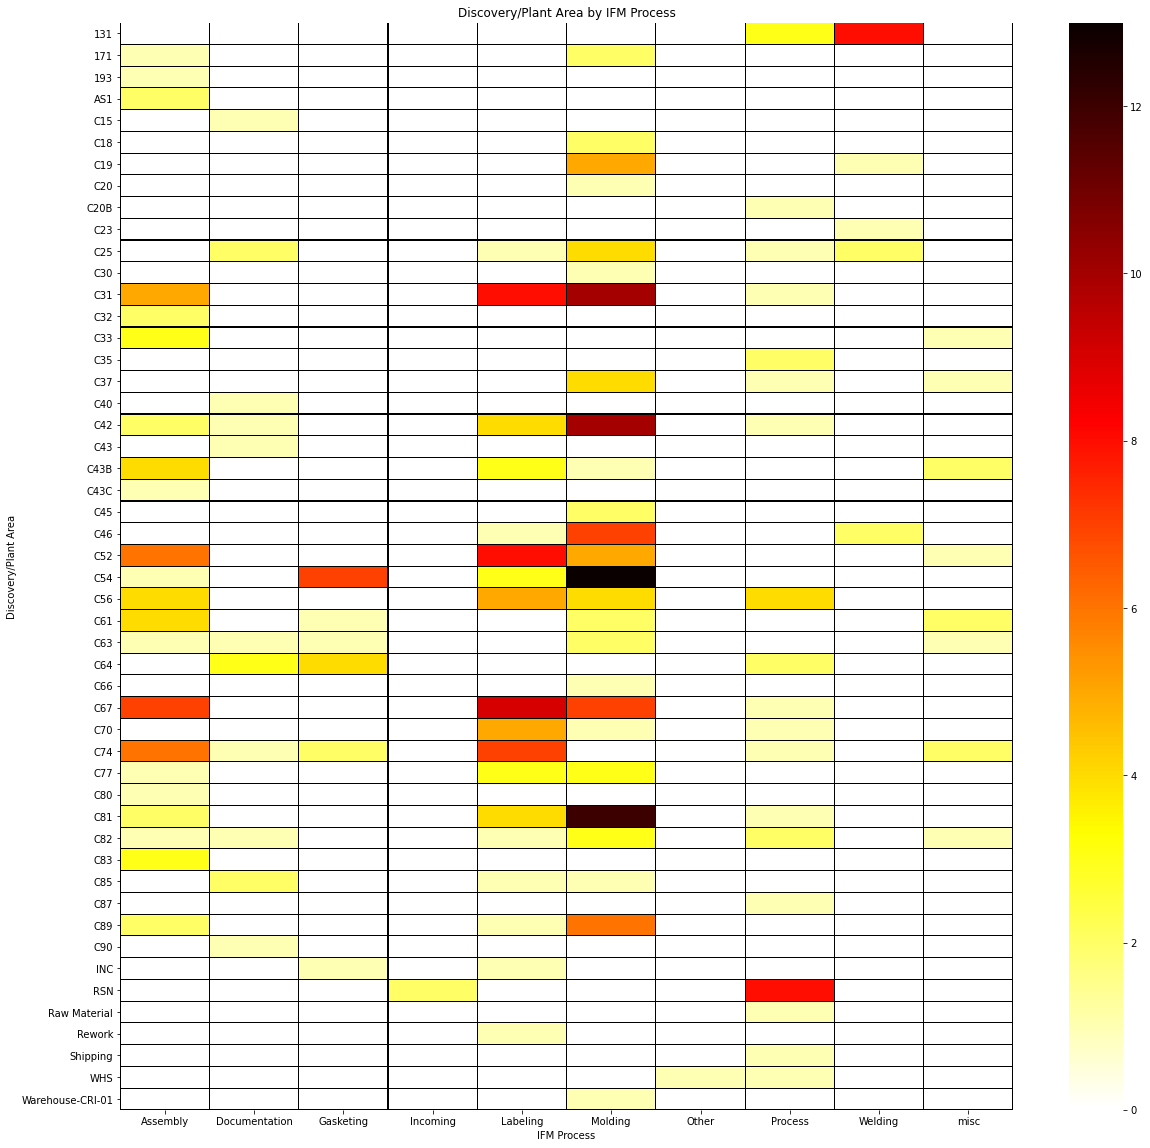

In [10]:
heatmaps(cff_ncs,'Discovery/Plant Area','IFM Process',figsize = (20,20))

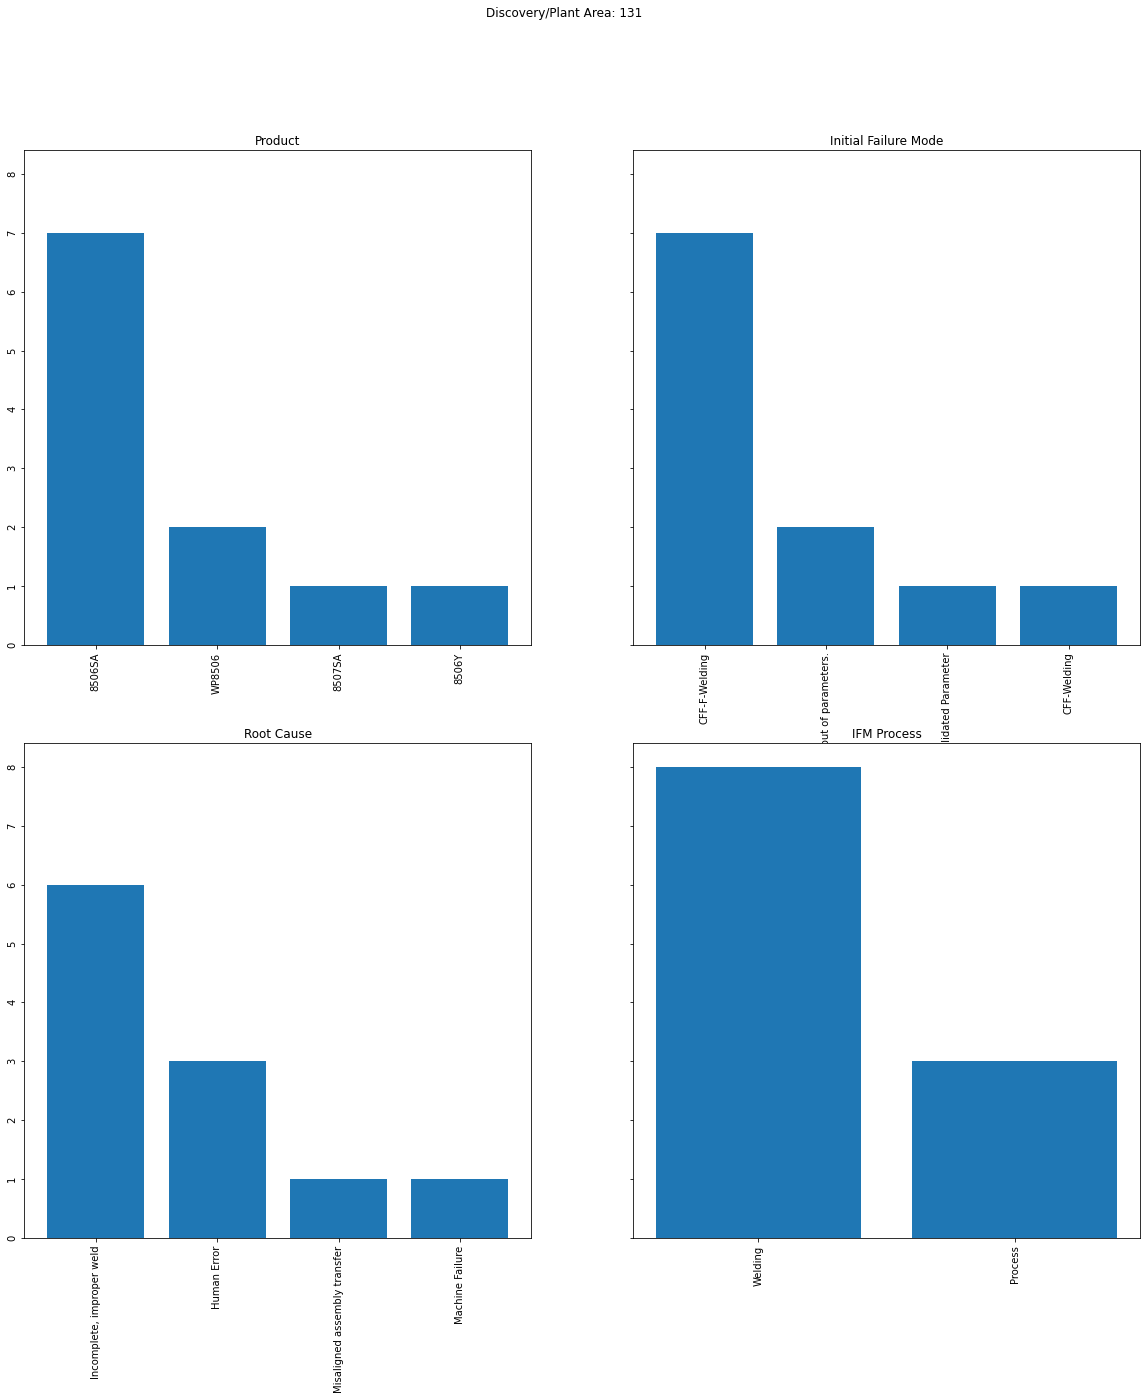

In [5]:
nc_sub_plotter(cff_ncs,'Discovery/Plant Area','131')

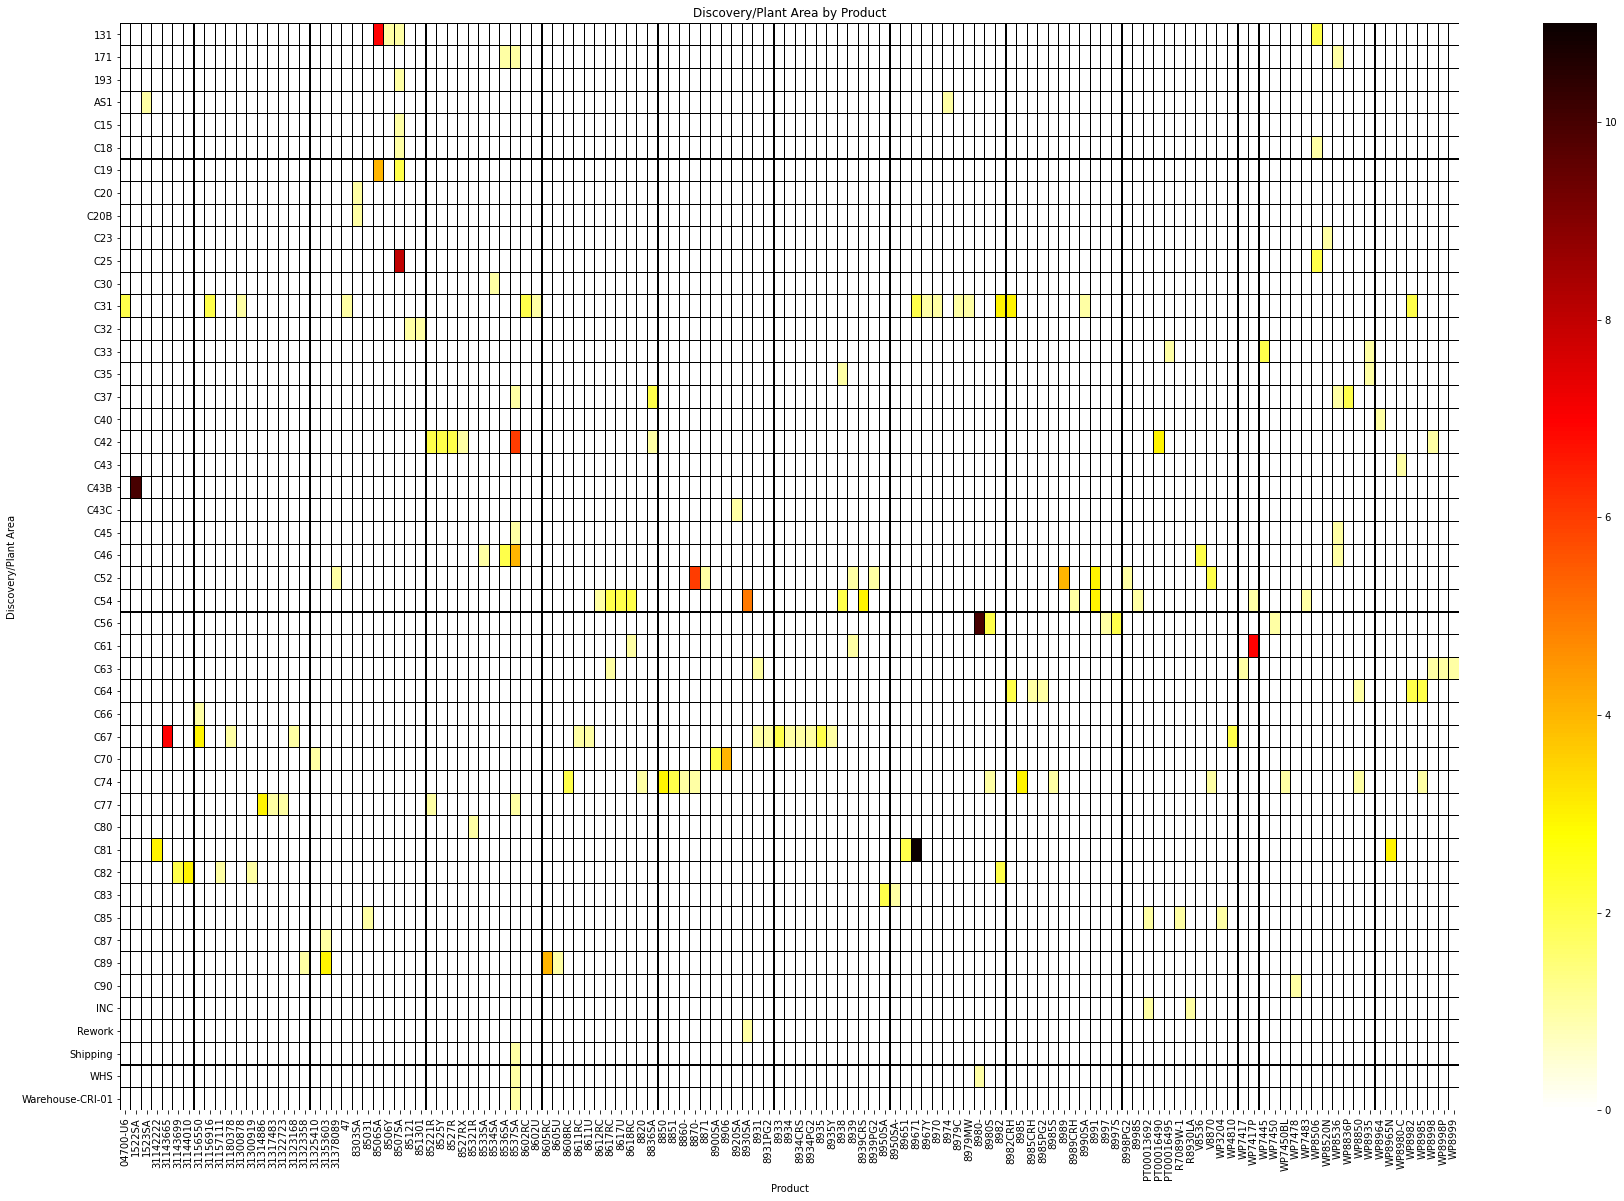

In [6]:
heatmaps(cff_ncs,'Discovery/Plant Area','Product',figsize = (30,20))

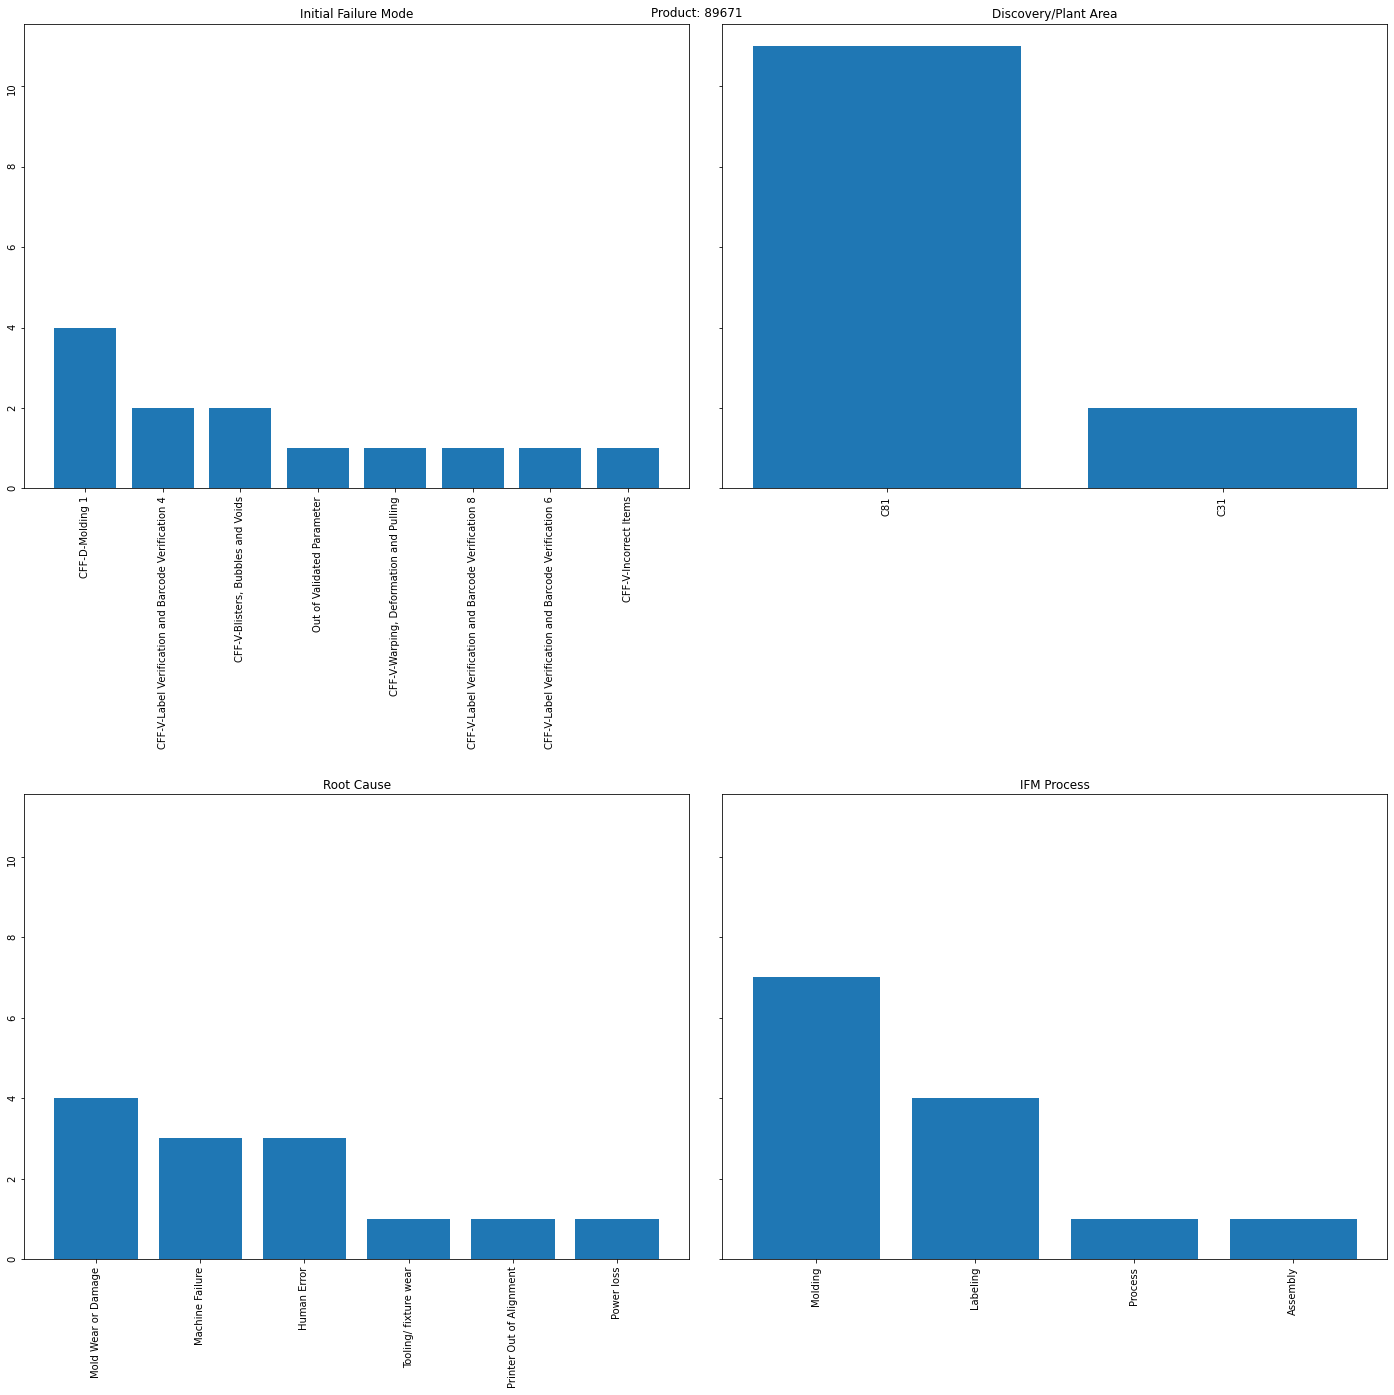

In [13]:
nc_sub_plotter(cff_ncs,'Product','89671')

[return](#smartsolve_ncs)

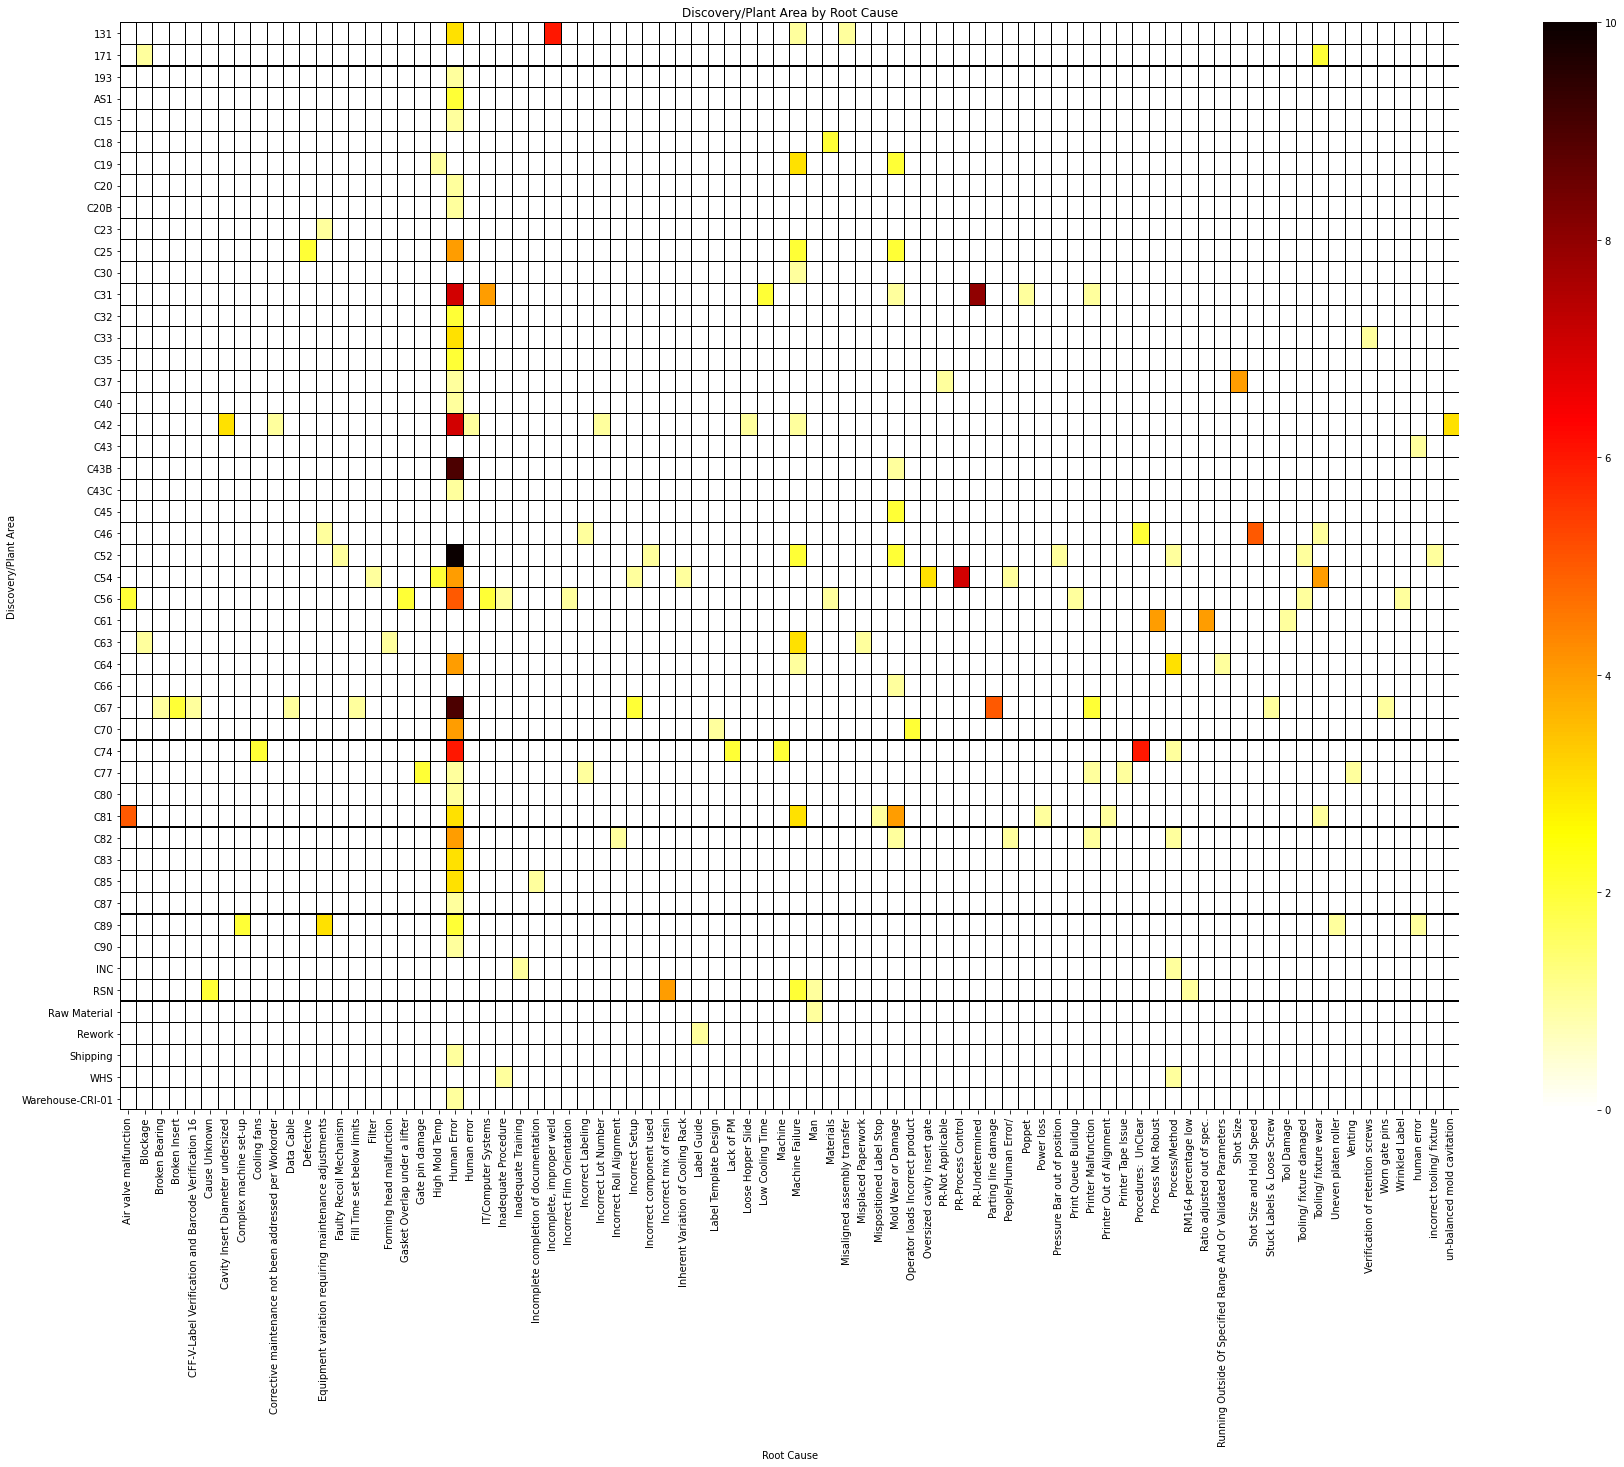

In [14]:
heatmaps(cff_ncs,'Discovery/Plant Area','Root Cause')

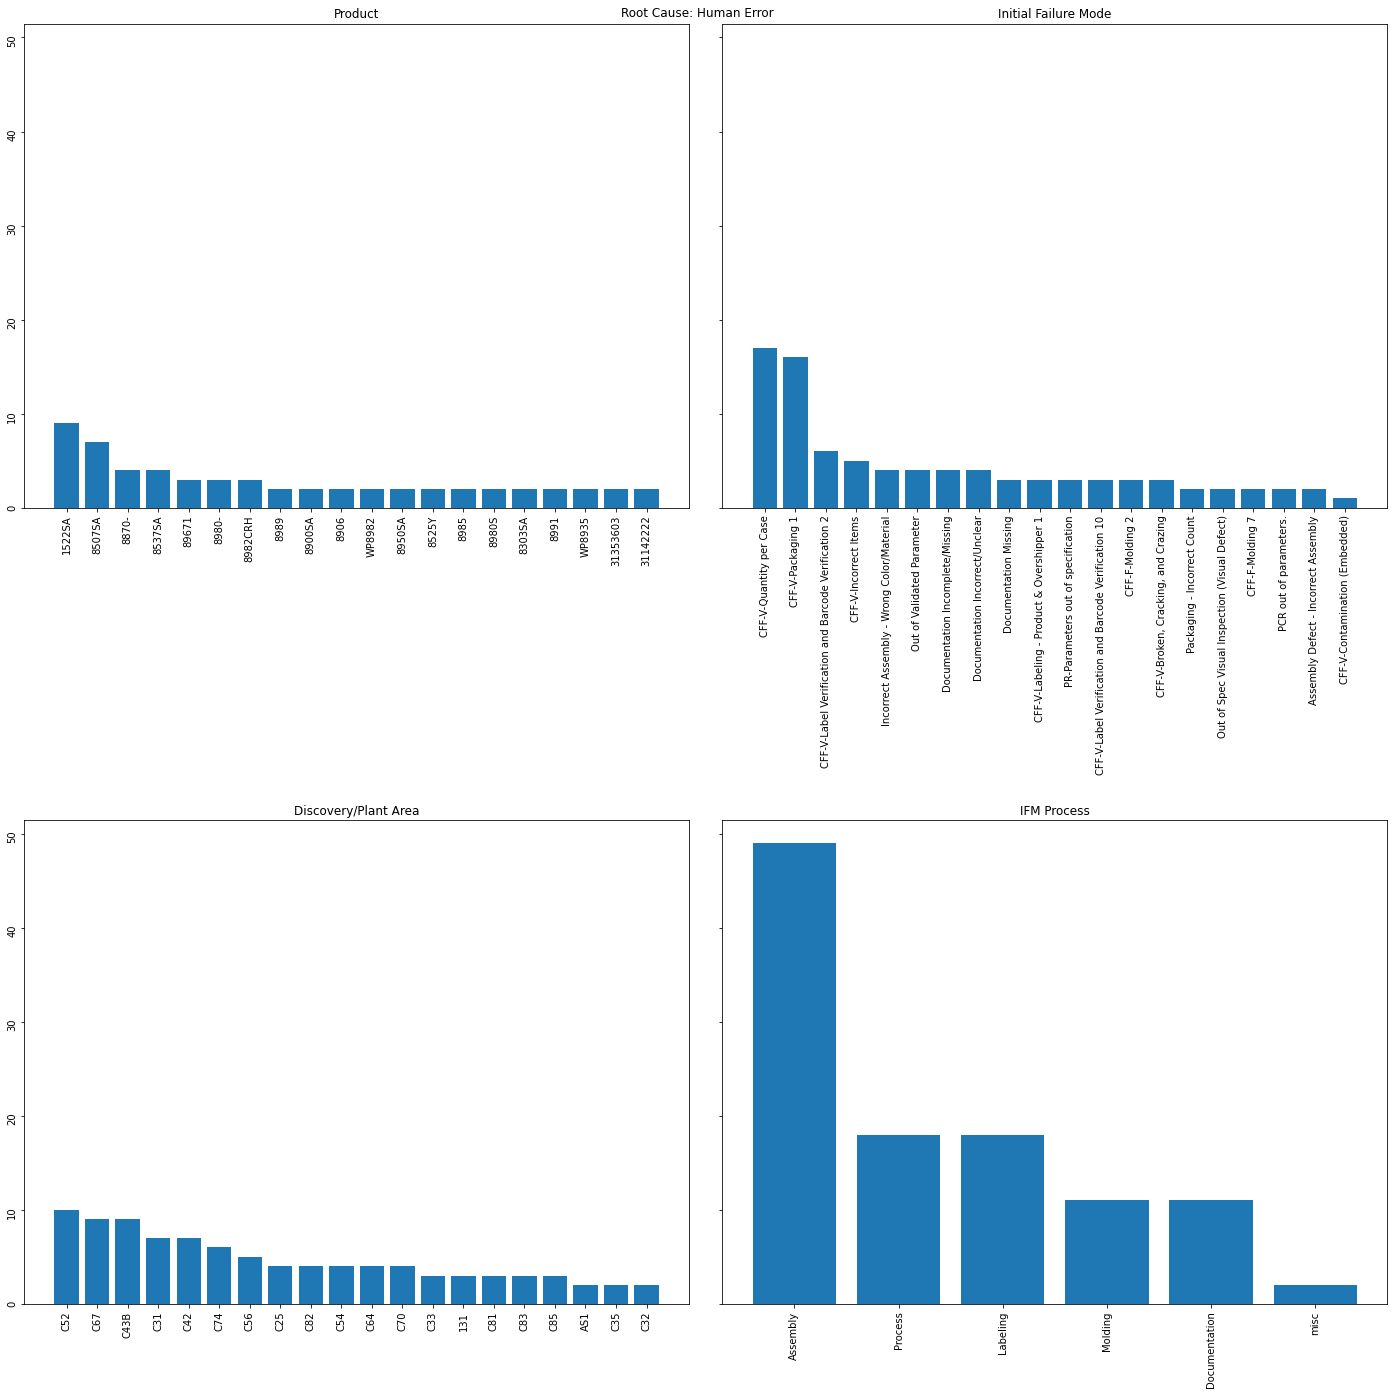

In [15]:
nc_sub_plotter(cff_ncs,'Root Cause','Human Error',top=20)

## Merging Data Sets

### Merging PlantStar and Archived_SO <a name = 'plant_archived_combo'></a>
[table of contents](#toc)

Resin doesn't always match 

In [16]:
test = cff_arch_so.merge(plantstar_df, on = 'shop_order',how = 'outer')
print('{} records have mismatched resins'.format(sum(test['resin_x'] != test['resin_y'])))
print('{} lots matched'.format(len(test)))
test.head()

3758 records have mismatched resins
4332 lots matched


,Unnamed: 0_x,Lot Number,Product,Date,shop_order,requested_qty,resin_x,Formula Sheet,packaging,colorant,...,bracket key,Value Stream,Unnamed: 0_y,tool,mach_name,resin_y,total_pieces,start_time,end_time,number of entries
0,1.0,09G189482,PT00096177,2019-08-16,189482,0.000,RM004,FS10002952,R1800,NaN,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,18G10763,85121,2019-01-23,184437,15000.000,RM004,FS10003096,R1246D,NaN,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,18G12463,8934,2019-02-19,184455,15200.000,RM160,FS10003181,R1292D,RM220,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,18G20663,1522SA,2019-01-02,184563,42519.860,RM129,FS10003045,R1302D,PT00065936,...,NaN,Containers,10.0,R7463B,431-T310,RM129,11503.0,2019-01-02 18:00:00,2019-01-07 06:00:00,20.0
4,11.0,18H07763,31378089,2019-01-07,184778,375645.192,RM157,FS10028268,R1750,PT00065936,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mismatched_resin_mask = test['resin_x'] != test['resin_y']
test[mismatched_resin_mask]

,Unnamed: 0_x,Lot Number,Product,Date,shop_order,requested_qty,resin_x,Formula Sheet,packaging,colorant,...,bracket key,Value Stream,Unnamed: 0_y,tool,mach_name,resin_y,total_pieces,start_time,end_time,number of entries
0,1.0,09G189482,PT00096177,2019-08-16,189482,0.000,RM004,FS10002952,R1800,NaN,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.0,18G10763,85121,2019-01-23,184437,15000.000,RM004,FS10003096,R1246D,NaN,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,18G12463,8934,2019-02-19,184455,15200.000,RM160,FS10003181,R1292D,RM220,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.0,18H07763,31378089,2019-01-07,184778,375645.192,RM157,FS10028268,R1750,PT00065936,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12.0,18H08163,8900SA,2019-01-16,184782,2520.000,RM160,FS10003166,CL63R1796,PT00065936,...,NaN,Containers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,NaN,NaN,NaN,NaT,198680,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1401.0,R7413B,67-H800,RM165,17280.0,2021-11-25 05:43:38,2021-12-02 18:00:00,17.0
4328,NaN,NaN,NaN,NaT,198666,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1402.0,R7463B,431-T310,RM129,8823.0,2021-11-29 07:53:28,2021-12-02 18:00:00,16.0
4329,NaN,NaN,NaN,NaT,198762,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1403.0,R7027D-Thin-Wall,70-N400,RM129,8516.0,2021-11-29 17:33:28,2021-11-30 14:00:00,4.0
4330,NaN,NaN,NaN,NaT,198691,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1404.0,R7026D,71-V300,RM171,8536.0,2021-11-29 17:33:32,2021-11-30 14:00:00,4.0
